In [ ]:
pip install pandas scikit-learn numpy


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load datasets
fertilizer_data = pd.read_csv('fertilizer.csv')
crop_recommendation_data = pd.read_csv('Crop_recommendation.csv')

# Preprocess Data
fertilizer_data = fertilizer_data.rename(columns={'Crop': 'label', 'soil_moisture': 'humidity'})
fertilizer_data = fertilizer_data[['label', 'N', 'P', 'K', 'pH', 'humidity']]
combined_data = pd.concat([crop_recommendation_data, fertilizer_data], axis=0, ignore_index=True)

# Drop any rows with missing values to ensure alignment
aligned_data = combined_data.dropna(subset=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

# Define features (X) and target (y) for nitrogen prediction
X = aligned_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = aligned_data['N']  # Nitrogen levels

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared:", r2)


Mean Squared Error: 0.015583409090909075
R-Squared: 0.9999875293709664


In [ ]:
import pandas as pd

# Load the uploaded CSV file

data = pd.read_csv('Crop_recommendation.csv')

# Display the first few rows and summary of the dataset
data.head(), data.describe(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


(    N   P   K  temperature   humidity        ph    rainfall label
 0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
 1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
 2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
 3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
 4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice,
                  N            P            K  temperature     humidity  \
 count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
 mean     50.551818    53.362727    48.149091    25.616244    71.481779   
 std      36.917334    32.985883    50.647931     5.063749    22.263812   
 min       0.000000     5.000000     5.000000     8.825675    14.258040   
 25%      21.000000    28.000000    20.000000    22.769375    60.261953   
 50%      37.000000    51.000000    32.000000    25.598693    80.473146   
 75%      84.250000    68.000000    49.000000    28.561654    89.948771 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load and preprocess the data

data = pd.read_csv('Crop_recommendation.csv')

# Encoding the crop labels (target variable)
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Splitting the dataset into features (X) and target (y)
X = data.drop('label', axis=1)
y = data['label']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Convert classification report to DataFrame for better readability
report_df = pd.DataFrame(report).transpose()

# Display accuracy and the classification report as tables
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report_df)


Model Accuracy: 99.09%

Classification Report:
               precision    recall  f1-score     support
apple          1.000000  1.000000  1.000000   34.000000
banana         1.000000  1.000000  1.000000   26.000000
blackgram      1.000000  1.000000  1.000000   26.000000
chickpea       1.000000  1.000000  1.000000   34.000000
coconut        1.000000  1.000000  1.000000   33.000000
coffee         1.000000  1.000000  1.000000   30.000000
cotton         1.000000  1.000000  1.000000   28.000000
grapes         1.000000  1.000000  1.000000   23.000000
jute           0.850000  1.000000  0.918919   34.000000
kidneybeans    1.000000  1.000000  1.000000   36.000000
lentil         1.000000  1.000000  1.000000   22.000000
maize          1.000000  1.000000  1.000000   26.000000
mango          1.000000  1.000000  1.000000   32.000000
mothbeans      1.000000  1.000000  1.000000   34.000000
mungbean       1.000000  1.000000  1.000000   30.000000
muskmelon      1.000000  1.000000  1.000000   24.000000


In [ ]:
def recommend_fertilizer(N, P, K, temperature, humidity, ph, rainfall):
    """
    Recommends fertilizer composition based on soil and environmental conditions.
    """
    # Create a DataFrame for the input
    input_data = pd.DataFrame({
        'N': [N],
        'P': [P],
        'K': [K],
        'temperature': [temperature],
        'humidity': [humidity],
        'ph': [ph],
        'rainfall': [rainfall]
    })

    # Predict the crop type
    predicted_crop = rf_model.predict(input_data)
    crop_name = label_encoder.inverse_transform(predicted_crop)[0]

    # Custom fertilizer recommendation logic (this is an example; values may be adjusted as needed)
    if crop_name in ["rice", "maize"]:
        fertilizer_recommendation = "Nitrogen-rich fertilizer"
    elif crop_name in ["wheat", "barley"]:
        fertilizer_recommendation = "Balanced NPK fertilizer"
    elif crop_name in ["cotton", "pigeonpeas"]:
        fertilizer_recommendation = "Phosphorus and Potassium rich fertilizer"
    else:
        fertilizer_recommendation = "General purpose NPK fertilizer"

    return {
        "predicted_crop": crop_name,
        "fertilizer_recommendation": fertilizer_recommendation
    }

# Example recommendation call
recommend_fertilizer(N=60, P=55, K=44, temperature=23.0, humidity=82.3, ph=7.5, rainfall=200)


{'predicted_crop': 'rice',
 'fertilizer_recommendation': 'Nitrogen-rich fertilizer'}

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load and preprocess the data

data = pd.read_csv('crop_recommendation.csv')

# Encoding the crop labels (target variable)
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Splitting the dataset into features (X) and target (y)
X = data.drop('label', axis=1)
y = data['label']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Recommendation function
def recommend_fertilizer(N, P, K, temperature, humidity, ph, rainfall):
    """
    Recommends fertilizer composition based on soil and environmental conditions.
    """
    # Create a DataFrame for the input
    input_data = pd.DataFrame({
        'N': [N],
        'P': [P],
        'K': [K],
        'temperature': [temperature],
        'humidity': [humidity],
        'ph': [ph],
        'rainfall': [rainfall]
    })

    # Predict the crop type
    predicted_crop = rf_model.predict(input_data)
    crop_name = label_encoder.inverse_transform(predicted_crop)[0]

    # Custom fertilizer recommendation logic
    if crop_name in ["rice", "maize"]:
        fertilizer_recommendation = "Nitrogen-rich fertilizer"
    elif crop_name in ["wheat", "barley"]:
        fertilizer_recommendation = "Balanced NPK fertilizer"
    elif crop_name in ["cotton", "pigeonpeas"]:
        fertilizer_recommendation = "Phosphorus and Potassium rich fertilizer"
    else:
        fertilizer_recommendation = "General purpose NPK fertilizer"

    return {
        "predicted_crop": crop_name,
        "fertilizer_recommendation": fertilizer_recommendation
    }

# Prompt user for input values
N = float(input("Enter the Nitrogen content (N): "))
P = float(input("Enter the Phosphorus content (P): "))
K = float(input("Enter the Potassium content (K): "))
temperature = float(input("Enter the Temperature in Celsius: "))
humidity = float(input("Enter the Humidity percentage: "))
ph = float(input("Enter the Soil pH level: "))
rainfall = float(input("Enter the Rainfall amount in mm: "))

# Generate recommendation
recommendation = recommend_fertilizer(N, P, K, temperature, humidity, ph, rainfall)
print("\nRecommended Crop and Fertilizer:")
print("Predicted Crop:", recommendation["predicted_crop"])
print("Fertilizer Recommendation:", recommendation["fertilizer_recommendation"])


Enter the Nitrogen content (N): 42
Enter the Phosphorus content (P): 54
Enter the Potassium content (K): 115
Enter the Temperature in Celsius: 54
Enter the Humidity percentage: 84
Enter the Soil pH level: 5
Enter the Rainfall amount in mm: 120

Recommended Crop and Fertilizer:
Predicted Crop: papaya
Fertilizer Recommendation: General purpose NPK fertilizer


In [ ]:
5# Predict the target for the test data
y_pred = rf_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Model Accuracy: 99.09%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        23
           8       0.85      1.00      0.92        34
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        34
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00

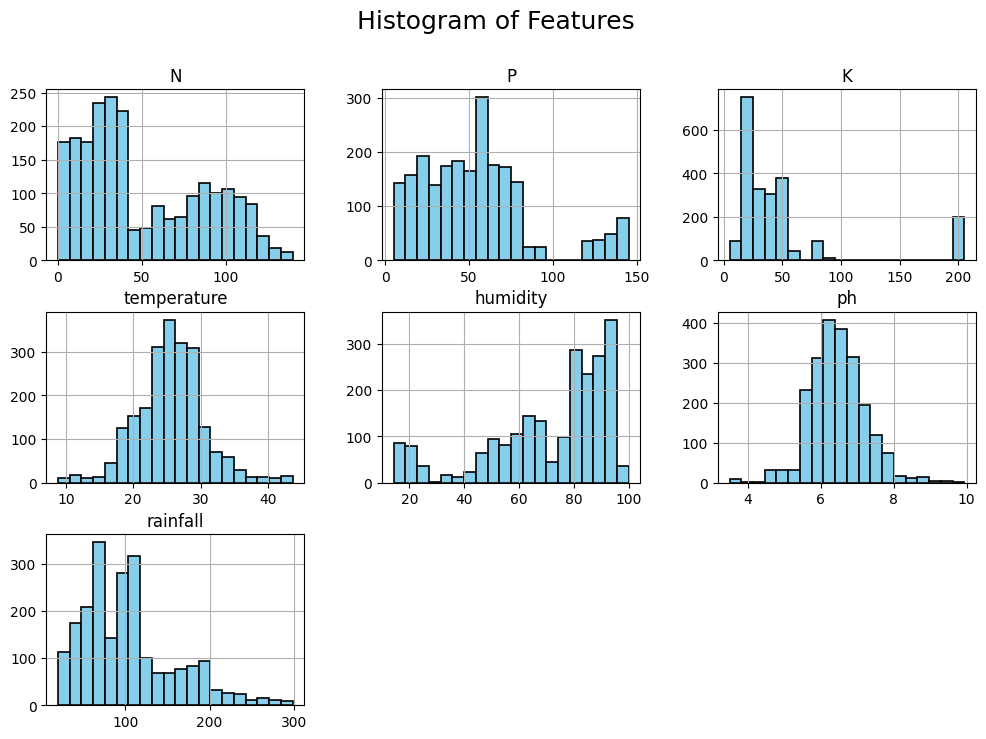

<ipython-input-10-f556f194ed71>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=data, palette='Set3')


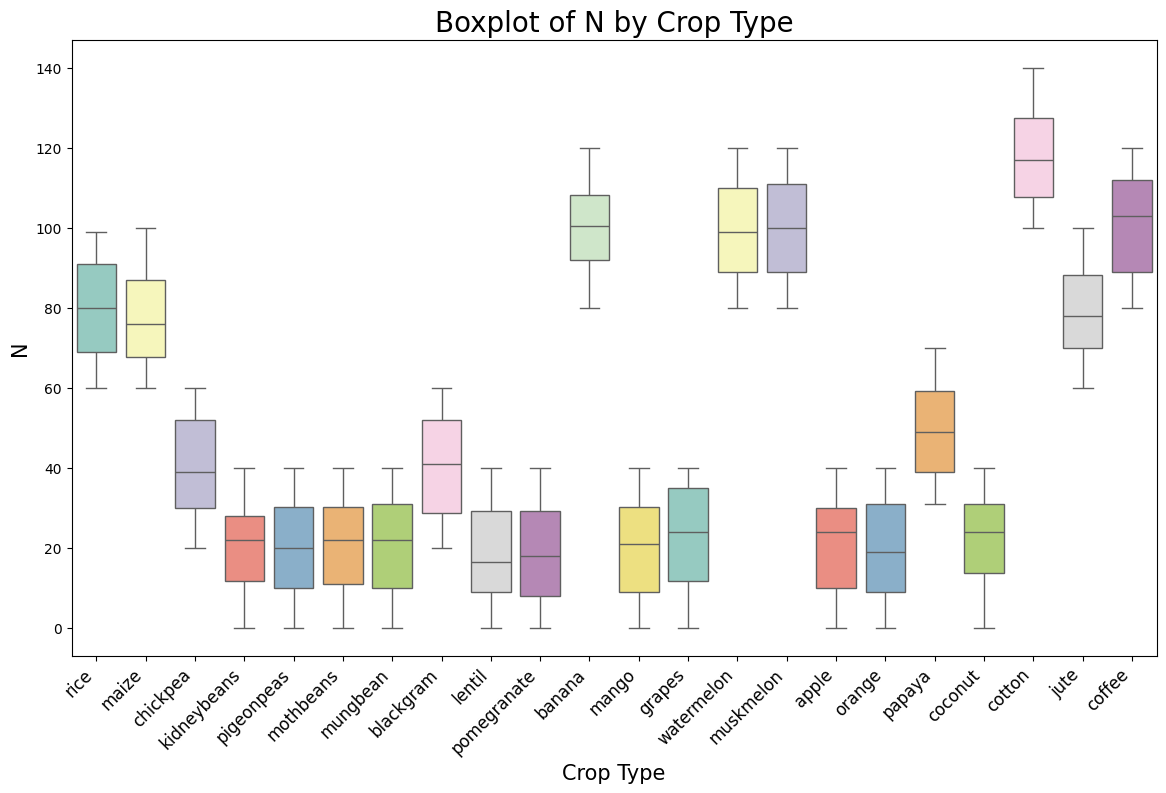

<ipython-input-10-f556f194ed71>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=data, palette='Set3')


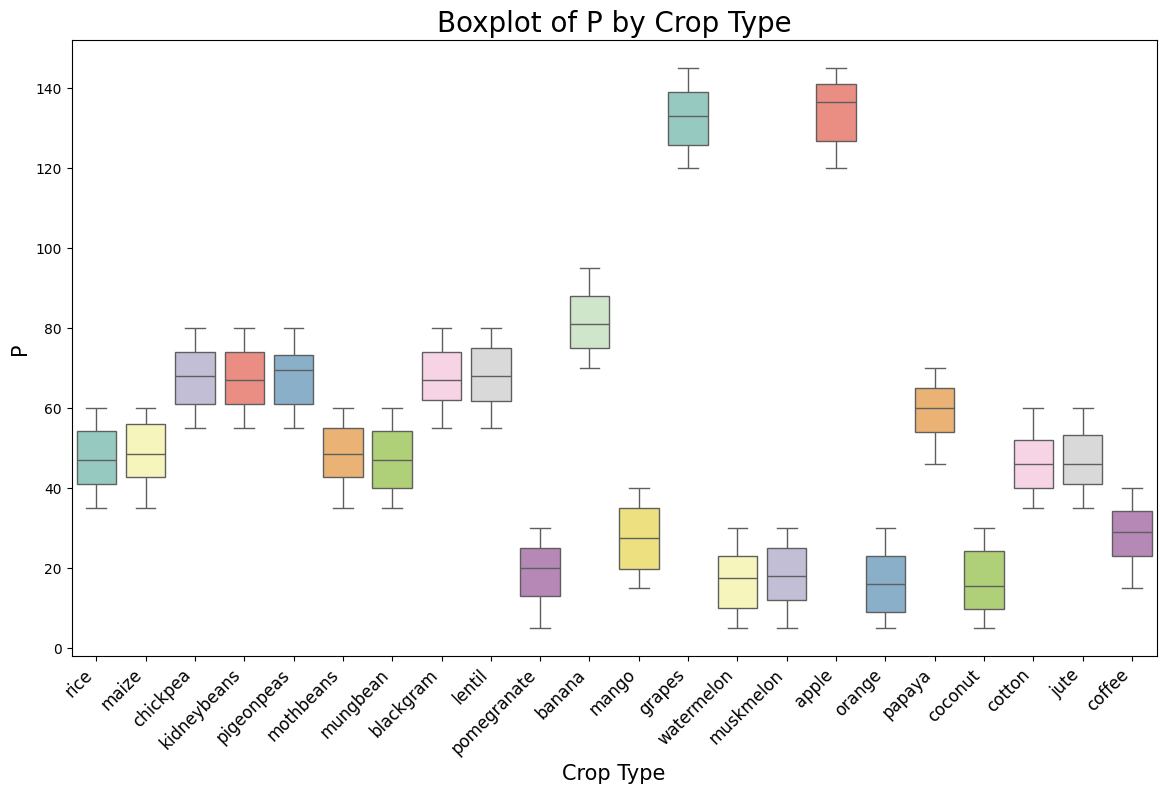

<ipython-input-10-f556f194ed71>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=data, palette='Set3')


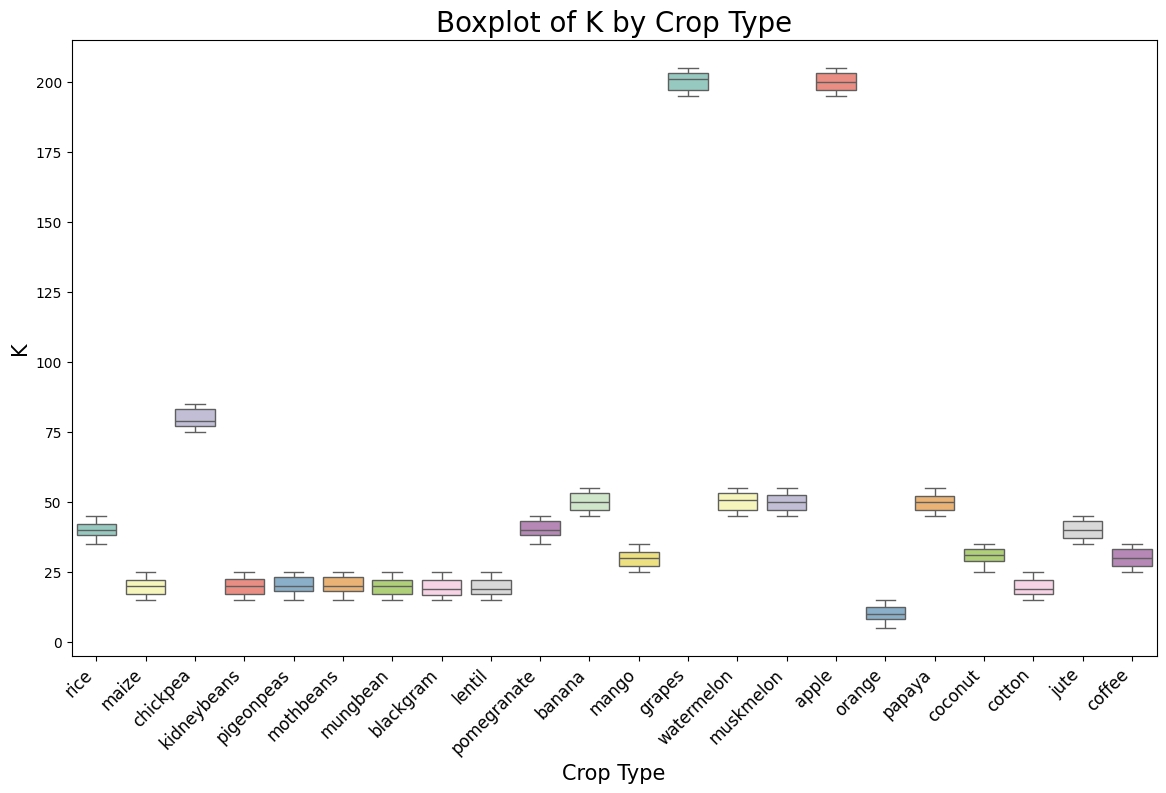

<ipython-input-10-f556f194ed71>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=data, palette='Set3')


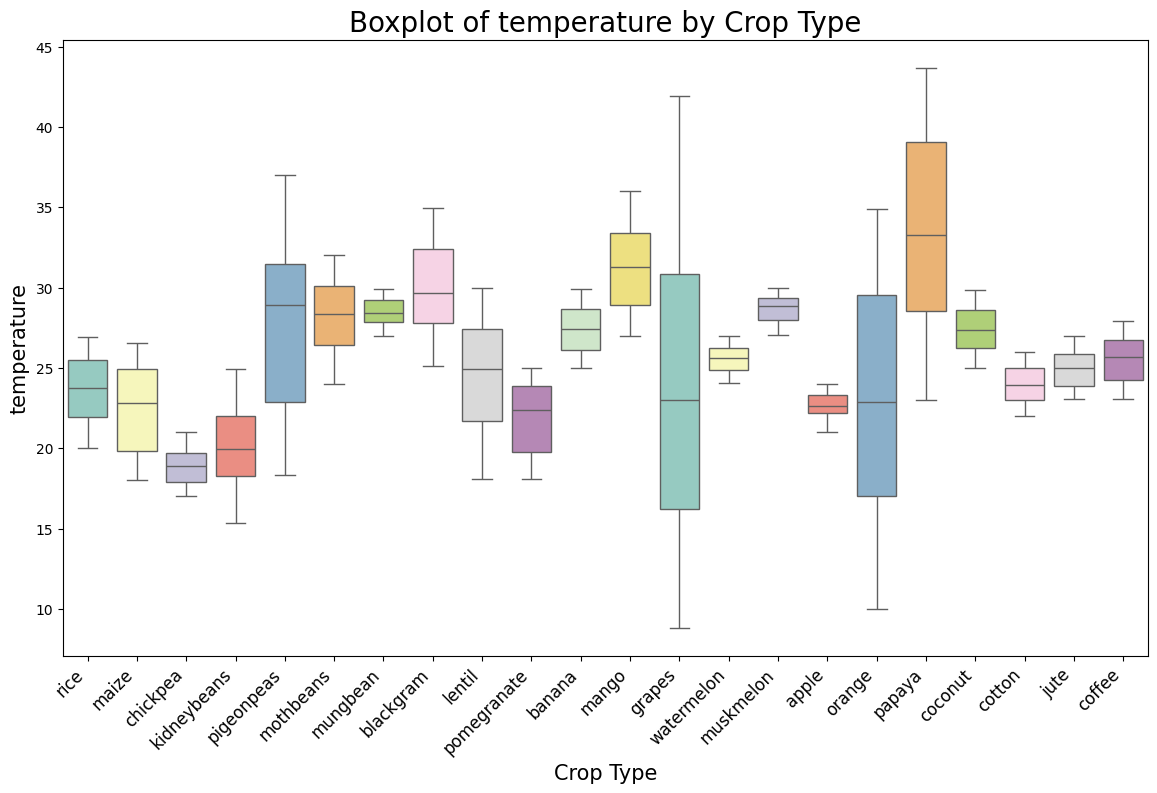

<ipython-input-10-f556f194ed71>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=data, palette='Set3')


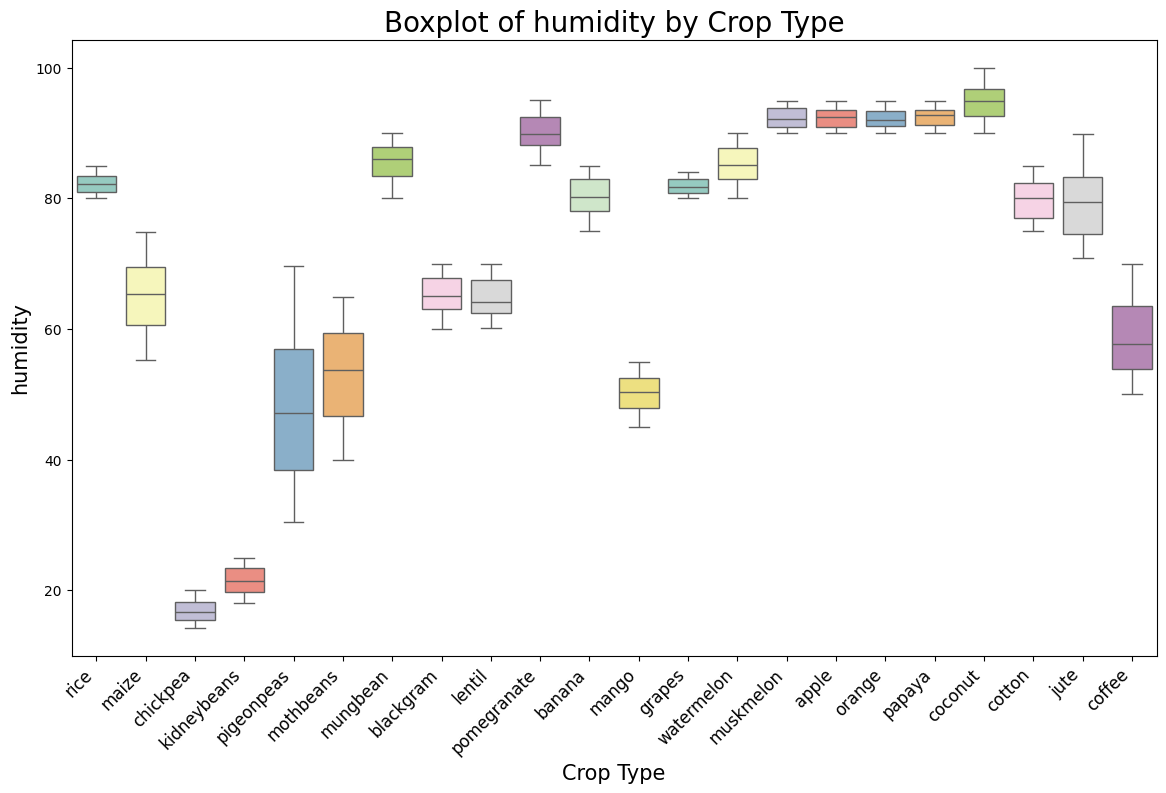

<ipython-input-10-f556f194ed71>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=data, palette='Set3')


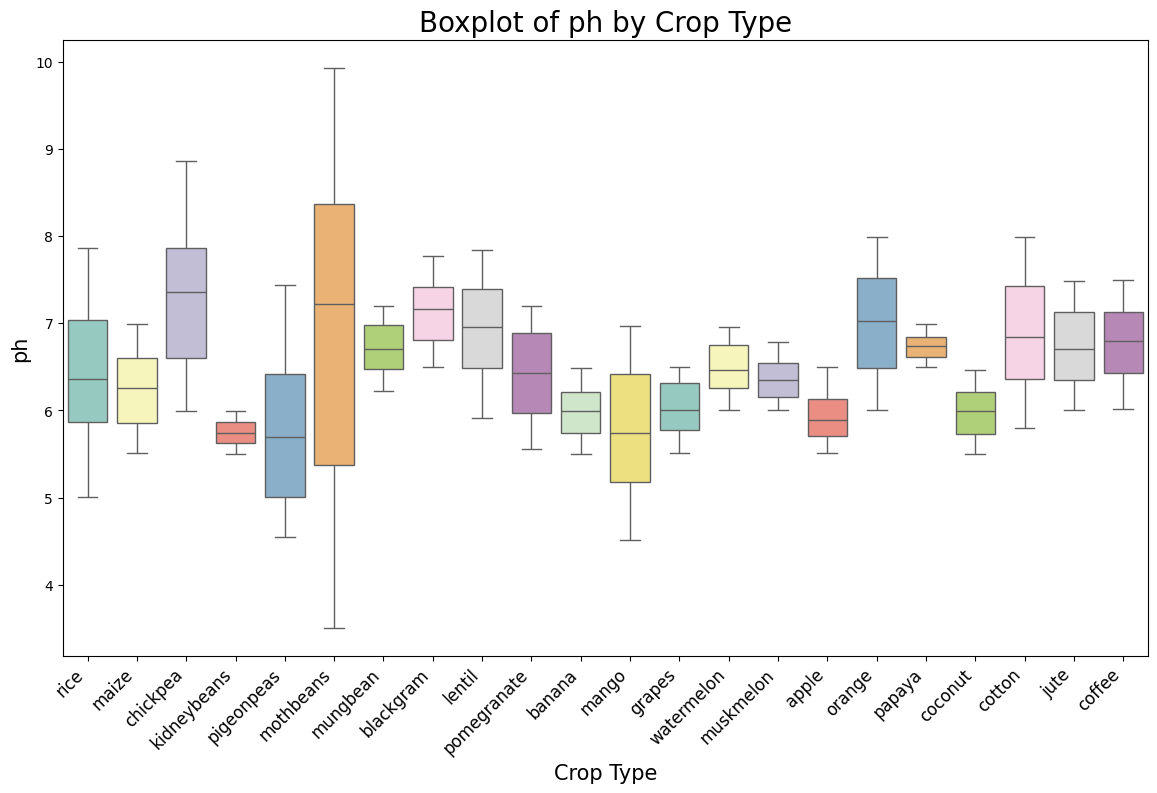

<ipython-input-10-f556f194ed71>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=data, palette='Set3')


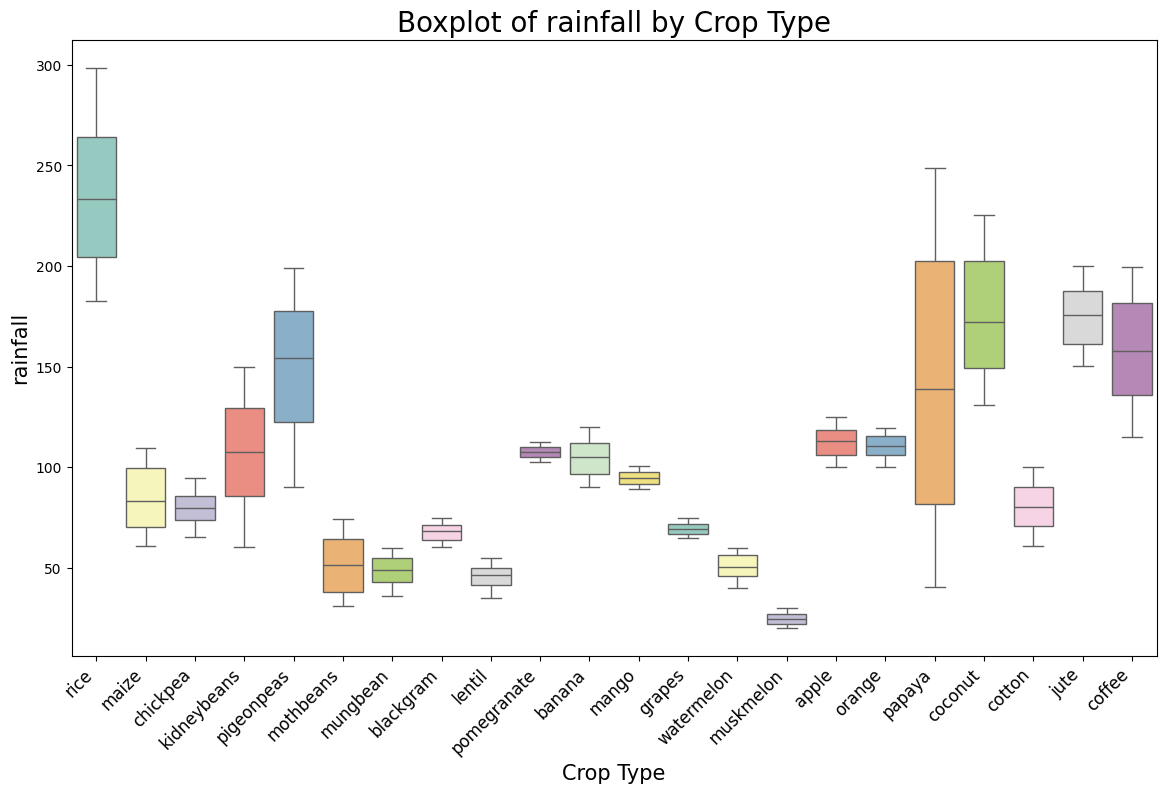

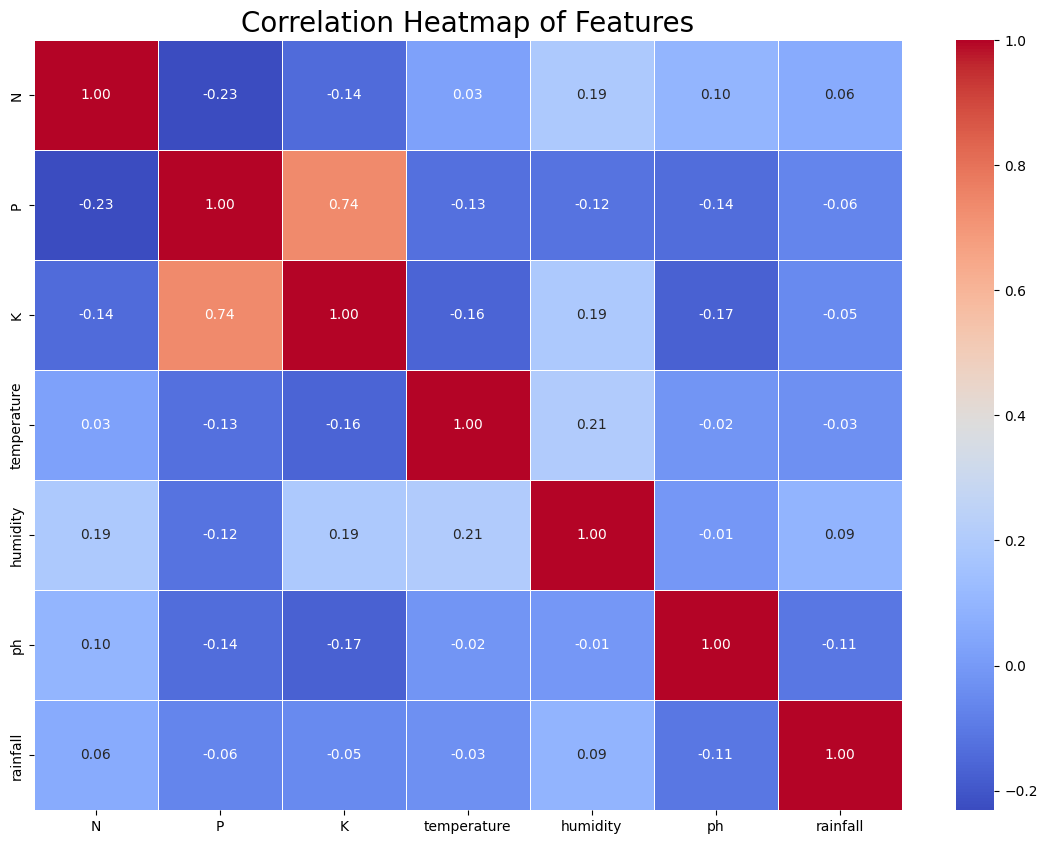

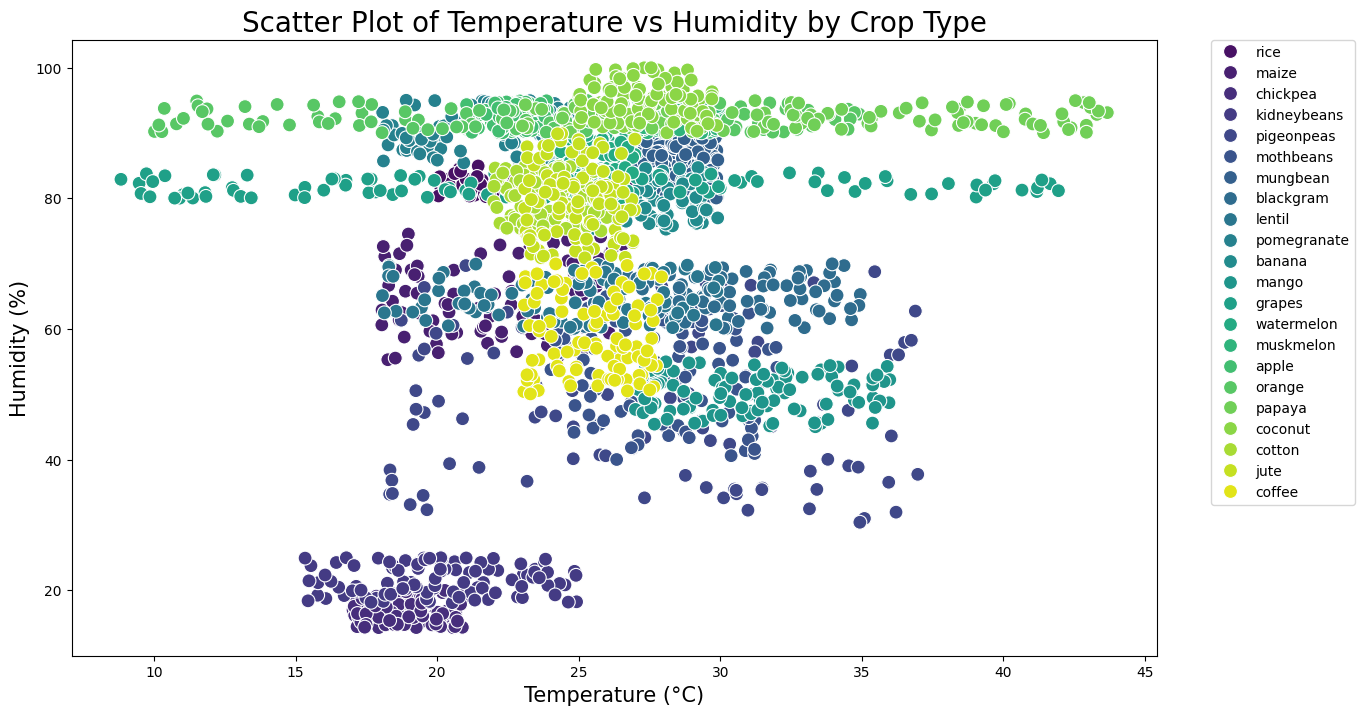

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('crop_recommendation.csv')

# Set a larger figure size for all plots
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Histograms for each feature
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Plot histograms in a single figure
data[features].hist(bins=20, edgecolor='black', color='skyblue', linewidth=1.2)
plt.suptitle('Histogram of Features', fontsize=18)
plt.show()



# 3. Boxplots: Distribution of each feature across different crops (one feature per plot)
for feature in features:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='label', y=feature, data=data, palette='Set3')
    plt.title(f'Boxplot of {feature} by Crop Type', fontsize=20)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.xlabel('Crop Type', fontsize=15)
    plt.ylabel(feature, fontsize=15)
    plt.show()

# 4. Correlation Heatmap: Display feature correlations
plt.figure(figsize=(14, 10))
correlation_matrix = data.drop('label', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontsize=20)
plt.show()

# 5. Scatter Plot: Visualize relationship between 'temperature' and 'humidity' with crop types
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='temperature', y='humidity', hue='label', palette='viridis', s=100, edgecolor='w')
plt.title('Scatter Plot of Temperature vs Humidity by Crop Type', fontsize=20)
plt.xlabel('Temperature (°C)', fontsize=15)
plt.ylabel('Humidity (%)', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
